In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

def set_axis_style(ax, labels):
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)

def preprocess_for_plot(df, state='state', prep='near'):
    return df.loc[(df.p_type == prep) & (df.state == state)].dis.to_list()

In [3]:
base_dir = '../outputs_processed/'

files = os.listdir(base_dir)

for i, f in enumerate(files):
    if i == 0:
        df_llama = pd.read_json(open(f'{base_dir}{f}'))
    else:
        df_llama_2 = pd.read_json(open(f'{base_dir}{f}'))
        df_llama = pd.concat([df_llama, df_llama_2])

In [4]:
df_llama.columns

Index(['name', 'lat', 'lng', 'near_city', 'far_city', 'p_type', 'p_length',
       'state', 'city_b', 'lat_b', 'lng_b', 'dis'],
      dtype='object')

In [5]:
df_llama.groupby(['p_type', 'p_length', 'state'])['dis'].mean()

p_type  p_length  state   
and     3-shot    no-state    2043.580248
                  state       1756.778816
close   3-shot    no-state    1312.020658
                  state        310.441550
far     3-shot    no-state    2561.481481
                  state       2570.833955
near    3-shot    no-state    1333.217845
                  state        335.603998
Name: dis, dtype: float64

In [6]:
df_llama.groupby(['p_type', 'p_length', 'state'])['dis'].median()

p_type  p_length  state   
and     3-shot    no-state    1502.469986
                  state       1501.442411
close   3-shot    no-state     306.222553
                  state        181.398355
far     3-shot    no-state    2352.410508
                  state       2362.423053
near    3-shot    no-state     317.043890
                  state        194.145265
Name: dis, dtype: float64

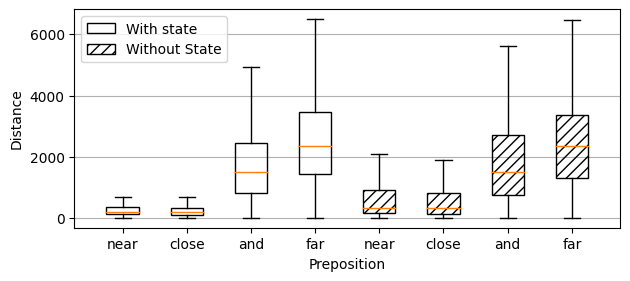

In [18]:

fig, axes = plt.subplots()

p = axes.boxplot(
    [
        preprocess_for_plot(df_llama, 'state', 'near'),
        preprocess_for_plot(df_llama, 'state', 'close'),
        preprocess_for_plot(df_llama, 'state', 'and'),
        preprocess_for_plot(df_llama, 'state', 'far'),
        preprocess_for_plot(df_llama, 'no-state', 'near'),
        preprocess_for_plot(df_llama, 'no-state', 'close'),
        preprocess_for_plot(df_llama, 'no-state', 'and'),
        preprocess_for_plot(df_llama, 'no-state', 'far'),
    ],
    showfliers=False,
    patch_artist=True
)
axes.yaxis.grid(True)
axes.set_ylabel('Distance')
axes.set_xlabel('Preposition')
labels = [
    'near',
    'close',
    'and',
    'far',
    'near',
    'close',
    'and',
    'far',
]
for i, box in enumerate(p['boxes']):
    if i in [0, 1, 2, 3]:
        box.set(hatch = '', fill=False)
    else:
        box.set(hatch = '///', fill=False)
set_axis_style(axes, labels)
# plt.xticks(rotation = 45)

circ1 = mpatches.Patch(hatch='', fill=False, label='With state')
circ2 = mpatches.Patch(hatch='///', fill=False, label='Without State')

axes.legend(handles = [circ1, circ2],loc=2)

axes.set_box_aspect(4/10)

plt.tight_layout()
# plt.show()
plt.savefig("plots/predicted_distances.png", dpi=300)

# LLama 2

In [12]:
base_dir_2 = '../outputs_processed_llama2/'

files_2 = os.listdir(base_dir_2)

for i, f in enumerate(files_2):
    if i == 0:
        df_llama2 = pd.read_json(open(f'{base_dir_2}{f}'))
    else:
        df_llama2_2 = pd.read_json(open(f'{base_dir_2}{f}'))
        df_llama2 = pd.concat([df_llama2, df_llama2_2])

In [13]:
df_llama2.groupby(['p_type', 'p_length', 'state'])['dis'].mean()

p_type  p_length  state   
and     3-shot    no-state    2187.208368
                  state       1959.721781
close   3-shot    no-state    1178.858931
                  state        285.190677
far     3-shot    no-state    2658.606433
                  state       2791.921976
near    3-shot    no-state    1164.492932
                  state        295.304499
Name: dis, dtype: float64

In [14]:
df_llama2.groupby(['p_type', 'p_length', 'state'])['dis'].median()

p_type  p_length  state   
and     3-shot    no-state    1774.828961
                  state       1747.735491
close   3-shot    no-state     287.144702
                  state        166.939004
far     3-shot    no-state    2515.260693
                  state       2640.067966
near    3-shot    no-state     304.716368
                  state        173.159433
Name: dis, dtype: float64

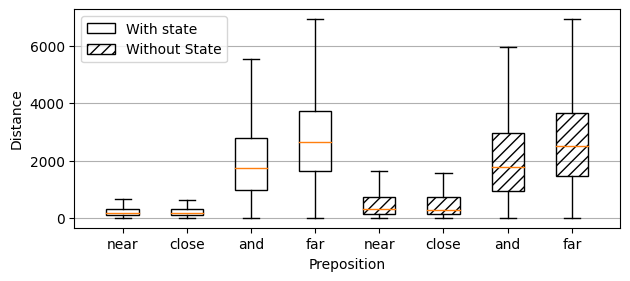

In [17]:
fig, axes = plt.subplots()

p = axes.boxplot(
    [
        preprocess_for_plot(df_llama2, 'state', 'near'),
        preprocess_for_plot(df_llama2, 'state', 'close'),
        preprocess_for_plot(df_llama2, 'state', 'and'),
        preprocess_for_plot(df_llama2, 'state', 'far'),
        preprocess_for_plot(df_llama2, 'no-state', 'near'),
        preprocess_for_plot(df_llama2, 'no-state', 'close'),
        preprocess_for_plot(df_llama2, 'no-state', 'and'),
        preprocess_for_plot(df_llama2, 'no-state', 'far'),
    ],
    showfliers=False,
    patch_artist=True
)
axes.yaxis.grid(True)
axes.set_ylabel('Distance')
axes.set_xlabel('Preposition')
labels = [
    'near',
    'close',
    'and',
    'far',
    'near',
    'close',
    'and',
    'far',
]
for i, box in enumerate(p['boxes']):
    if i in [0, 1, 2, 3]:
        box.set(hatch = '', fill=False)
    else:
        box.set(hatch = '///', fill=False)
set_axis_style(axes, labels)
# plt.xticks(rotation = 45)

circ1 = mpatches.Patch(hatch='', fill=False, label='With state')
circ2 = mpatches.Patch(hatch='///', fill=False, label='Without State')

axes.legend(handles = [circ1, circ2],loc=2)

axes.set_box_aspect(4/10)

plt.tight_layout()
# plt.show()
plt.savefig("plots/predicted_distances_llama2.png", dpi=300)